<a href="https://colab.research.google.com/github/Pedro-dev-083/notebook-mobile-price/blob/main/Notebook_Mobile_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Preço de Celular - Pedro Souza de Azevedo
## Realizando os imports

In [12]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Pedro-dev-083/notebook-mobile-price/main/train.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 83 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:20]
y = array[:,20]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.652500 (0.031150)
KNN: 0.915625 (0.016829)
CART: 0.825000 (0.017897)
NB: 0.802500 (0.021323)
SVM: 0.946875 (0.018802)
Bagging: 0.887500 (0.012500)
RF: 0.856875 (0.017556)
ET: 0.825625 (0.022088)
Ada: 0.649375 (0.087921)
GB: 0.903125 (0.015117)
Voting: 0.898125 (0.013419)


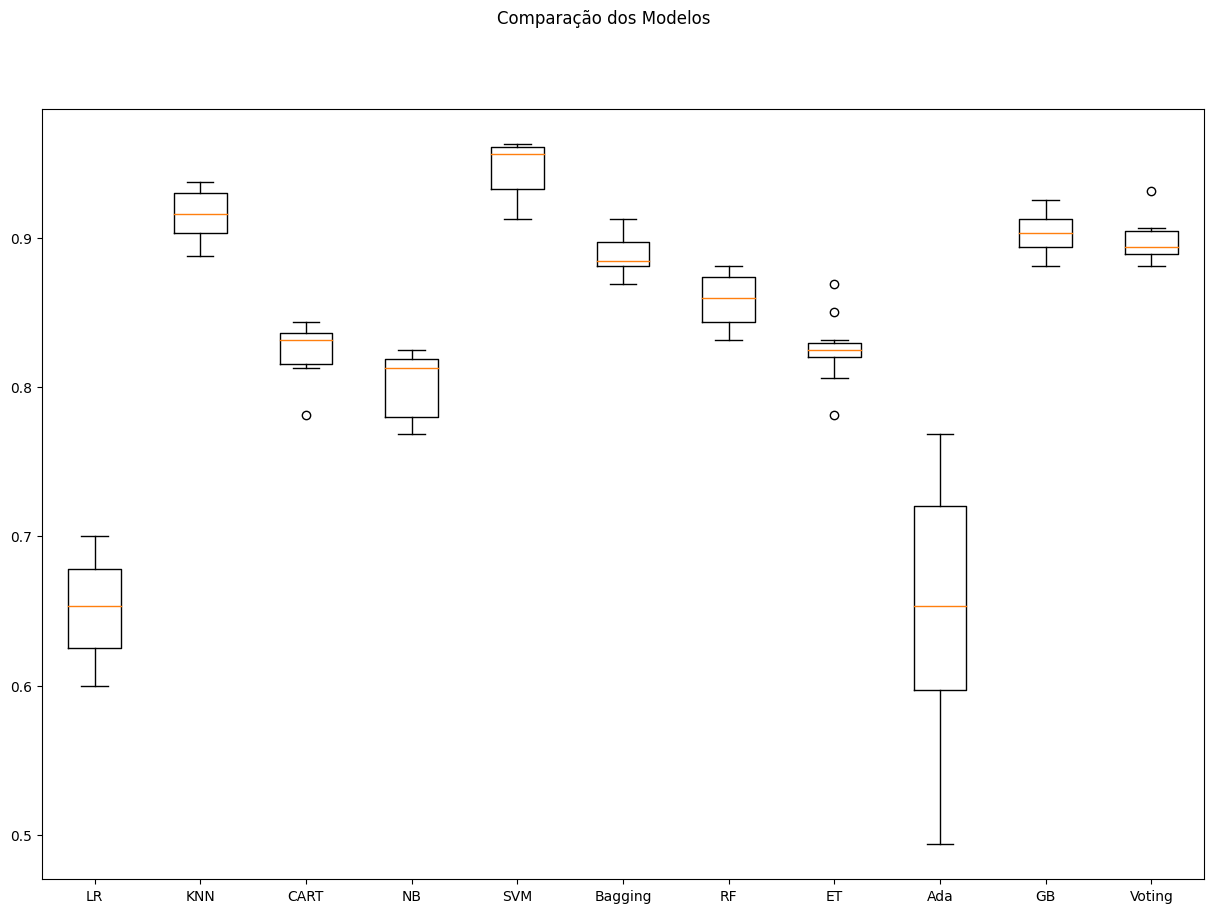

In [4]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.653 (0.031)
KNN-orig: 0.916 (0.017)
CART-orig: 0.825 (0.018)
NB-orig: 0.802 (0.021)
SVM-orig: 0.947 (0.019)
Bag-orig: 0.887 (0.012)
RF-orig: 0.857 (0.018)
ET-orig: 0.826 (0.022)
Ada-orig: 0.649 (0.088)
GB-orig: 0.903 (0.015)
Vot-orig: 0.898 (0.013)
LR-padr: 0.958 (0.012)
KNN-padr: 0.504 (0.036)
CART-padr: 0.826 (0.014)
NB-padr: 0.802 (0.021)
SVM-padr: 0.864 (0.009)
Bag-padr: 0.889 (0.013)
RF-padr: 0.859 (0.013)
ET-padr: 0.811 (0.028)
Ada-padr: 0.649 (0.088)
GB-padr: 0.903 (0.015)
Vot-padr: 0.930 (0.017)
LR-norm: 0.905 (0.029)
KNN-norm: 0.392 (0.046)
CART-norm: 0.826 (0.013)
NB-norm: 0.802 (0.021)
SVM-norm: 0.846 (0.021)
Bag-norm: 0.887 (0.017)
RF-norm: 0.851 (0.030)
ET-norm: 0.822 (0.022)
Ada-norm: 0.649 (0.088)
GB-norm: 0.903 (0.015)
Vot-norm: 0.897 (0.028)

Melhor modelo: LR-padr com pontuação de 0.958


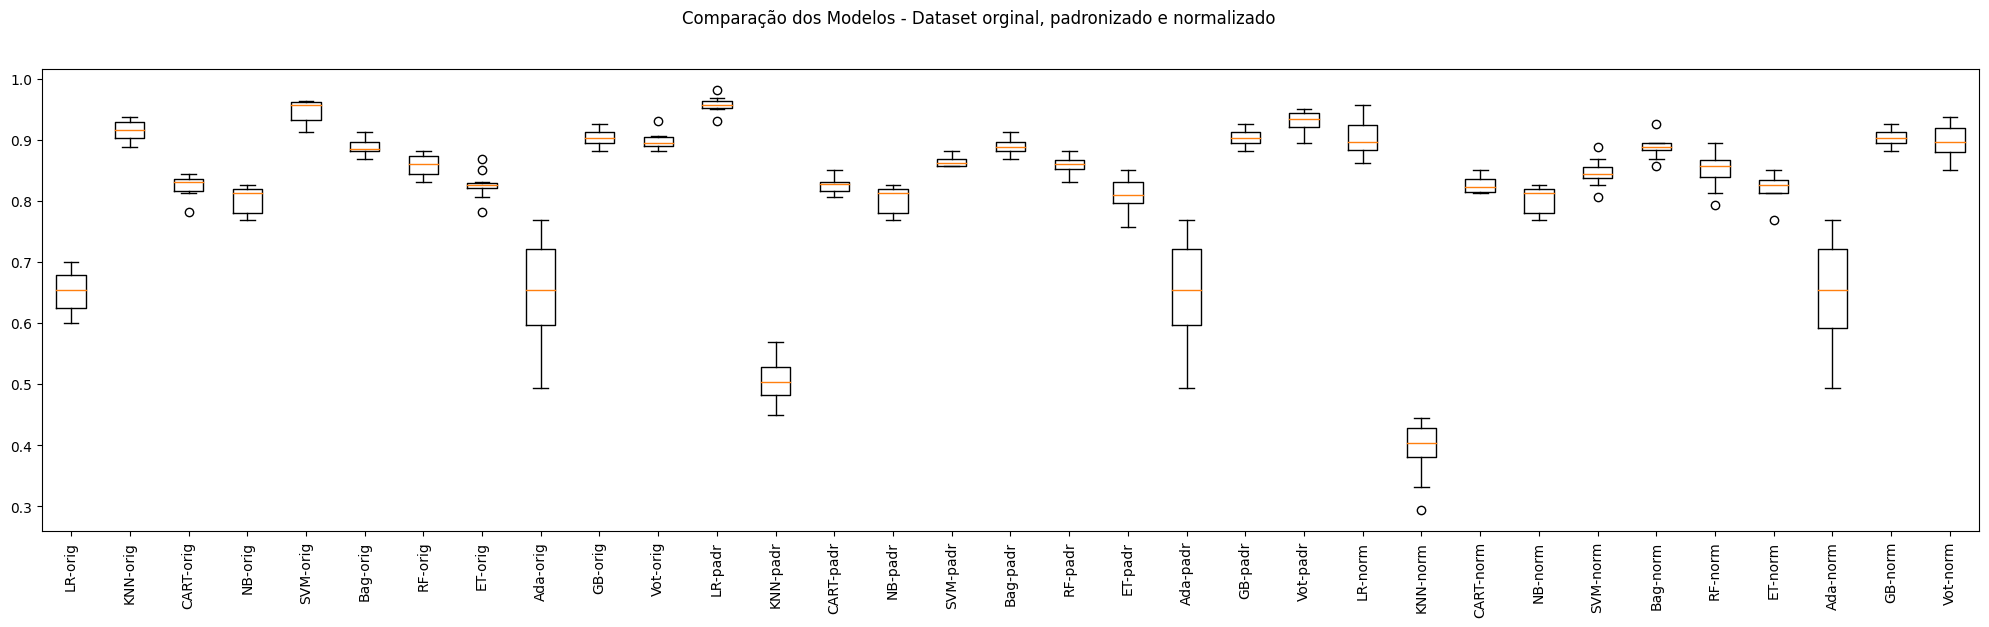

In [5]:
np.random.seed(seed) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Inicializando variáveis para armazenar o melhor modelo e sua pontuação
best_score = 0.0
best_model = None

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

    # Calculando a média dos resultados de validação cruzada
    mean_score = cv_results.mean()
    std_dev = cv_results.std()

    # Verificando se a média atual é maior que a melhor pontuação até agora
    if mean_score > best_score:
        best_score = mean_score
        best_model = name  # Armazena o nome do modelo com a maior pontuação

    # Exibindo o nome do modelo e a média dos resultados
    msg = f"{name}: {mean_score:.3f} ({std_dev:.3f})"
    print(msg)

# Exibir o melhor modelo e a pontuação correspondente
print(f"\nMelhor modelo: {best_model} com pontuação de {best_score:.3f}")


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [6]:
# Tuning do LR

np.random.seed(seed) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
reg_log = ('LR', LogisticRegression(max_iter=200))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))


# Definindo a grid de parâmetros para o Logistic Regression
param_grid = {
    'LR__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Variação do parâmetro de regularização C
    'LR__penalty': ['l2'],  # Penalty L2 (ridge), L1 é suportado apenas por 'liblinear' e 'saga'
    'LR__solver': ['lbfgs'],  # Escolha do solver
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: LR-orig - Melhor: 0.656250 usando {'LR__C': 0.001, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Resultado: LR-padr - Melhor: 0.970625 usando {'LR__C': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Resultado: LR-norm - Melhor: 0.970000 usando {'LR__C': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}


## Finalização do Modelo

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.96


In [8]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## Simulando a aplicação do modelo em dados não vistos

In [9]:
# Novos dados - não sabemos a classe!
data = {'battery_power':  [4000, 3000, 1810],
        'blue': [1, 1, 1],
        'clock_speed': [1.8, 2, 1.4],
        'dual_sim': [1, 1, 0],
        'fc': [8, 5, 1],
        'four_g': [1, 1, 1],
        'int_memory': [64, 32, 16],
        'm_dep': [0.8, 0.97, 0.69],
        'mobile_wt': [177, 155, 129],
        'n_cores': [8, 8, 2],
        'pc': [20, 12, 8],
        'px_height': [1560, 1920, 1334],
        'px_width': [720, 1080, 750],
        'ram': [3072, 3072, 1024],
        'sc_h': [15, 12, 10],
        'sc_w': [7, 7, 6],
        'talk_time': [20, 24, 14],
        'three_g': [1, 1, 1],
        'touch_screen': [1, 1, 1],
        'wifi': [1, 1, 1]
        }

atributos = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
             'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
             'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
             'three_g', 'touch_screen', 'wifi']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:20].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 6.28597562e+00  1.01005050e+00  3.40463273e-01  9.81177118e-01
   8.50275435e-01  9.57885975e-01  1.76137956e+00  1.03435682e+00
   1.03843360e+00  1.52124939e+00  1.66317579e+00  2.06210090e+00
  -1.23009974e+00  8.73970711e-01  6.39453349e-01  2.83102801e-01
   1.64555670e+00  5.59640631e-01  9.94017892e-01  9.86096642e-01]
 [ 4.00967008e+00  1.01005050e+00  5.85621345e-01  9.81177118e-01
   1.59088250e-01  9.57885975e-01 -2.56322936e-03  1.62393154e+00
   4.16803191e-01  1.52124939e+00  3.43653173e-01  2.87351506e+00
  -3.96942653e-01  8.73970711e-01 -7.27649718e-02  2.83102801e-01
   2.37781021e+00  5.59640631e-01  9.94017892e-01  9.86096642e-01]
 [ 1.30086650e+00  1.01005050e+00 -1.49852872e-01 -1.01918398e+00
  -7.62494663e-01  9.57885975e-01 -8.84534623e-01  6.52867297e-01
  -3.17850932e-01 -1.10197128e+00 -3.16108138e-01  1.55271312e+00
  -1.16066999e+00 -1.01452535e+00 -5.47577186e-01  5.34979341e-02
   5.47176436e-01  5.59640631e-01  9.94017892e-01  9.86096642e-01]]


In [10]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[3. 3. 1.]


## Geração do pickle

In [14]:
# Salva o modelo no disco
filename = 'model.pkl'
dump(model, open(filename, 'wb'))